In [1]:
import pandas as pd
from datetime import datetime
df1= pd.read_csv('/kaggle/input/asadata/meenachil(nasa).csv')
df1

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE
0,1984,1,1,5.22,23.73,15.87,2.04,96.46,1.91
1,1984,1,2,5.04,22.29,15.08,0.20,96.51,0.92
2,1984,1,3,5.52,23.89,14.95,0.01,96.53,0.96
3,1984,1,4,5.15,23.76,15.08,0.00,96.58,1.98
4,1984,1,5,5.03,23.71,14.47,0.03,96.51,1.61
...,...,...,...,...,...,...,...,...,...
13965,2022,3,27,5.50,27.75,16.54,6.67,96.33,2.00
13966,2022,3,28,6.67,27.77,16.97,7.94,96.31,1.17
13967,2022,3,29,6.70,28.33,16.78,3.21,96.22,2.12
13968,2022,3,30,6.16,28.22,16.85,2.59,96.18,1.70


In [2]:
df1['datetime'] = pd.to_datetime(df1[['YEAR', 'MO', 'DY']].rename(columns={'YEAR':'year', 'MO':'month', 'DY':'day'}))
df1['datetime'] = df1['datetime'].dt.strftime('%d/%m/%Y')
df1 = df1.drop(['YEAR', 'MO', 'DY'], axis=1)
df1

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,datetime
0,5.22,23.73,15.87,2.04,96.46,1.91,01/01/1984
1,5.04,22.29,15.08,0.20,96.51,0.92,02/01/1984
2,5.52,23.89,14.95,0.01,96.53,0.96,03/01/1984
3,5.15,23.76,15.08,0.00,96.58,1.98,04/01/1984
4,5.03,23.71,14.47,0.03,96.51,1.61,05/01/1984
...,...,...,...,...,...,...,...
13965,5.50,27.75,16.54,6.67,96.33,2.00,27/03/2022
13966,6.67,27.77,16.97,7.94,96.31,1.17,28/03/2022
13967,6.70,28.33,16.78,3.21,96.22,2.12,29/03/2022
13968,6.16,28.22,16.85,2.59,96.18,1.70,30/03/2022


In [3]:
df2 = pd.read_csv('/kaggle/input/dischargedata/Meenachil_Gauge-Discharge_Data_Kidangoor1985-20171.csv', header=2,na_values='null')
df2 = df2.drop(['Observed/Computed','Data Type'],axis=1)
df2

,Day,Mean Gauge (m),Discharge (cumecs)
0,1/6/1985,2.016,NaN
1,2/6/1985,1.916,NaN
2,3/6/1985,2.876,NaN
3,4/6/1985,2.816,NaN
4,5/6/1985,3.266,NaN
...,...,...,...
11683,27/5/2017,2.640,36.440
11684,28/5/2017,1.500,NaN
11685,29/5/2017,2.800,46.657
11686,30/5/2017,3.000,65.251


merging two data set based on the common dates

In [4]:
df1['datetime'] = pd.to_datetime(df1['datetime'], format='%d/%m/%Y')
df2['Day'] = pd.to_datetime(df2['Day'], format='%d/%m/%Y')

df2 = df2.rename(columns={'Day': 'datetime'})
df2 = df2.set_index('datetime')
df1=df1.set_index('datetime')
df = pd.concat([df1, df2], axis=1, join='inner')

In [5]:
df

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1985-06-01,3.16,23.75,17.21,9.81,96.10,3.02,2.016,NaN
1985-06-02,2.95,23.53,17.52,29.36,96.13,1.21,1.916,NaN
1985-06-03,3.58,23.47,17.15,46.45,96.10,1.38,2.876,NaN
1985-06-04,4.20,23.81,17.15,9.45,96.16,1.35,2.816,NaN
1985-06-05,2.34,23.36,17.09,5.75,96.28,1.01,3.266,NaN
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,25.73,18.07,5.76,96.05,1.54,2.640,36.440
2017-05-28,3.32,25.29,18.43,12.94,96.08,2.12,1.500,NaN
2017-05-29,1.90,25.44,18.92,17.14,96.05,1.97,2.800,46.657


In [6]:
# from google.colab import files
# df.to_csv('chalakudi_combined.csv', index=True)
# files.download('chalakudi_combined.csv')

In [7]:
min(df['Discharge (cumecs)'])

nan

In [8]:
max(df['Discharge (cumecs)'])

nan

In [9]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN       0
TS                      0
QV2M                    0
PRECTOTCORR             0
PS                      0
WS10M_RANGE             0
Mean Gauge (m)          0
Discharge (cumecs)    219
dtype: int64

In [10]:
# df['TS'] = df['TS'].interpolate(method='linear')
# df['T2M'] = df['T2M'].interpolate(method='linear')
# df['QV2M'] = df['QV2M'].interpolate(method='linear')
# df['PRECTOTCORR'] = df['PRECTOTCORR'].interpolate(method='linear')
# df['PS'] = df['PS'].interpolate(method='linear')
# df['WS50M_RANGE'] = df['WS50M_RANGE'].interpolate(method='linear')
df['Discharge (cumecs)'] = df['Discharge (cumecs)'].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

In [11]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN     0
TS                    0
QV2M                  0
PRECTOTCORR           0
PS                    0
WS10M_RANGE           0
Mean Gauge (m)        0
Discharge (cumecs)    0
dtype: int64

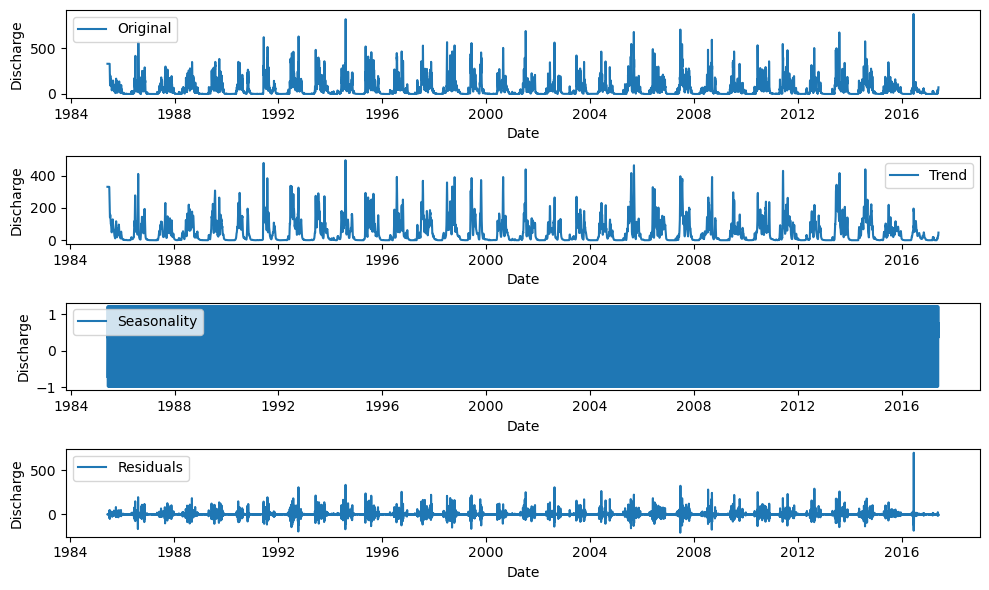

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Discharge (cumecs)'], model='additive')

trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(df['Discharge (cumecs)'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(seasonality,label='Seasonality')
plt.legend()
plt.subplot(414)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(residuals, label='Residuals')
plt.legend()
plt.tight_layout()

plt.show()

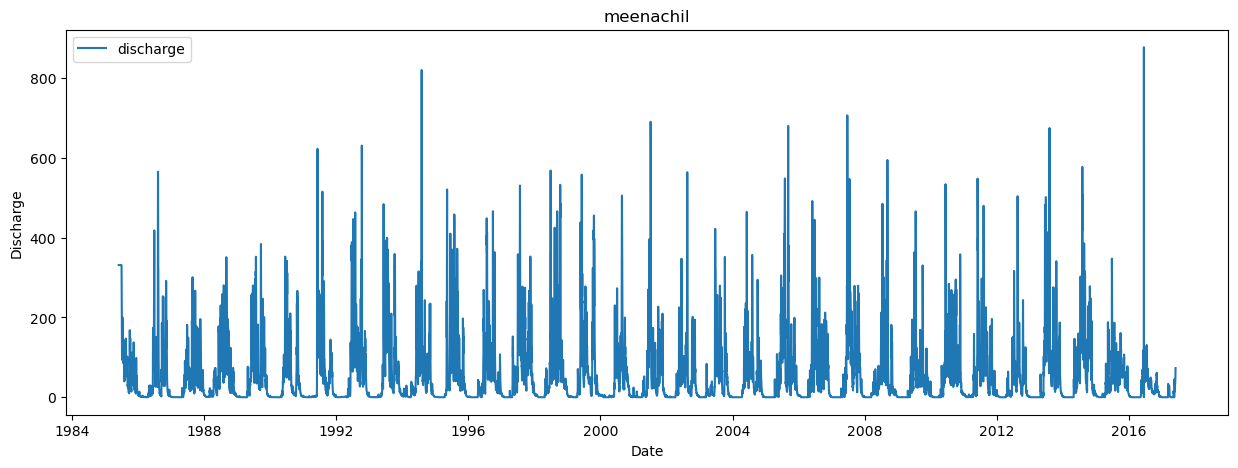

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(df['Discharge (cumecs)'],label='discharge')
plt.title("meenachil")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()

In [14]:
df.corr()

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
ALLSKY_SFC_SW_DWN,1.000000,0.411697,-0.426593,-0.486322,0.264343,-0.163809,-0.510923,-0.460277
TS,0.411697,1.000000,-0.022648,-0.161596,-0.188240,0.046331,-0.397112,-0.317994
QV2M,-0.426593,-0.022648,1.000000,0.329598,-0.497459,0.016365,0.459172,0.373527
PRECTOTCORR,-0.486322,-0.161596,0.329598,1.000000,-0.264626,0.106366,0.437478,0.439232
PS,0.264343,-0.188240,-0.497459,-0.264626,1.000000,-0.168814,-0.277934,-0.249539
WS10M_RANGE,-0.163809,0.046331,0.016365,0.106366,-0.168814,1.000000,0.196021,0.206704
Mean Gauge (m),-0.510923,-0.397112,0.459172,0.437478,-0.277934,0.196021,1.000000,0.936926
Discharge (cumecs),-0.460277,-0.317994,0.373527,0.439232,-0.249539,0.206704,0.936926,1.000000


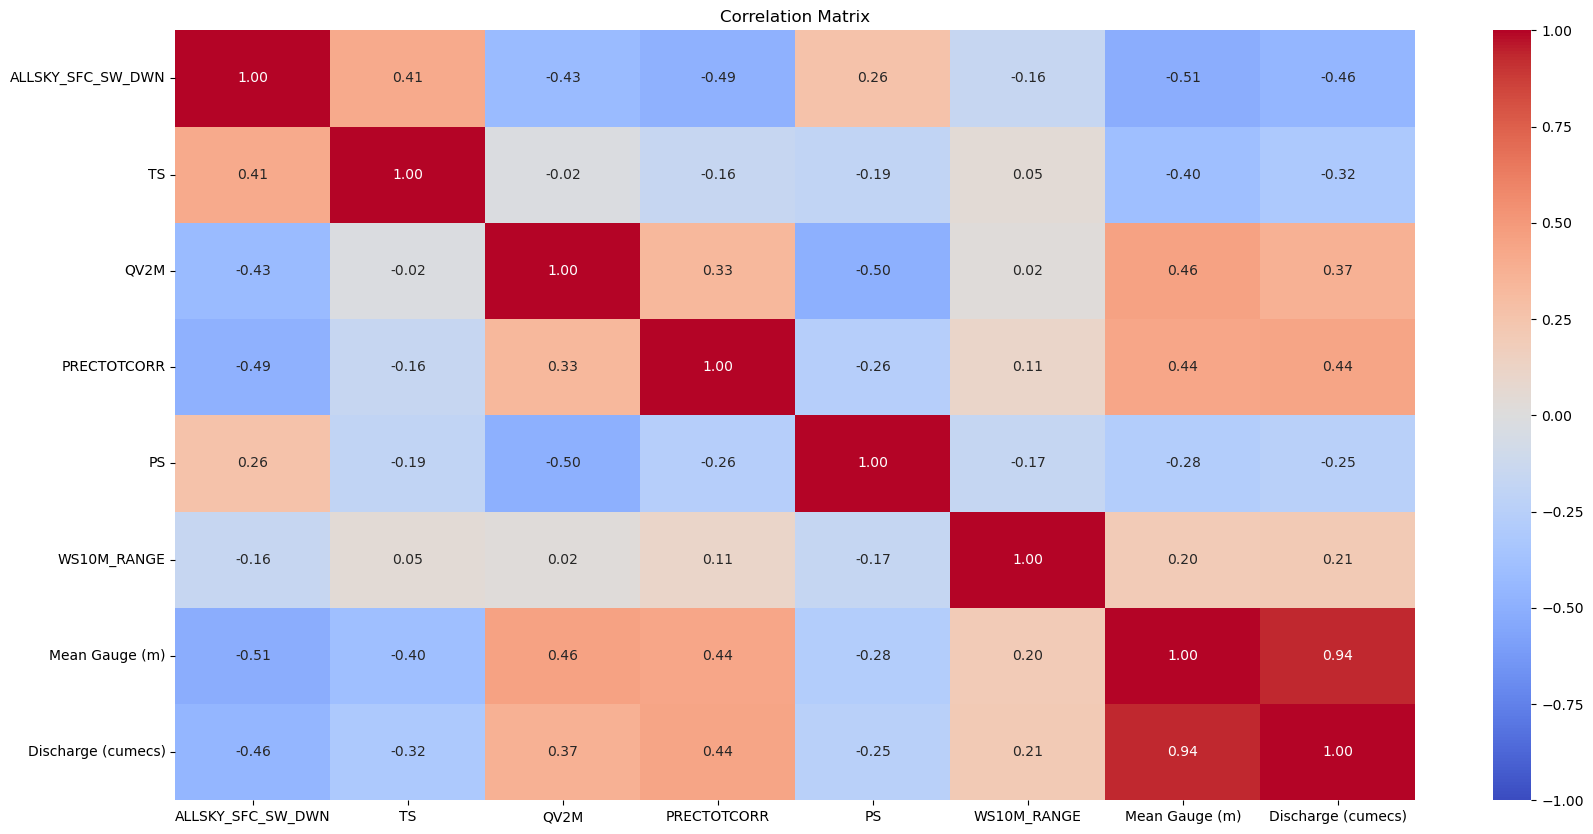

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [16]:
df

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1985-06-01,3.16,23.75,17.21,9.81,96.10,3.02,2.016,331.1000
1985-06-02,2.95,23.53,17.52,29.36,96.13,1.21,1.916,331.1000
1985-06-03,3.58,23.47,17.15,46.45,96.10,1.38,2.876,331.1000
1985-06-04,4.20,23.81,17.15,9.45,96.16,1.35,2.816,331.1000
1985-06-05,2.34,23.36,17.09,5.75,96.28,1.01,3.266,331.1000
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,25.73,18.07,5.76,96.05,1.54,2.640,36.4400
2017-05-28,3.32,25.29,18.43,12.94,96.08,2.12,1.500,41.5485
2017-05-29,1.90,25.44,18.92,17.14,96.05,1.97,2.800,46.6570


splitting the data set to train and test data
train data- before 2010-01-10
test data- after 2010-01-10


In [17]:
df.index = pd.to_datetime(df.index)
cutoff_date = pd.to_datetime('2010-01-10')
train = df[df.index < cutoff_date]
test = df[df.index >= cutoff_date]
train

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1985-06-01,3.16,23.75,17.21,9.81,96.10,3.02,2.016,331.100
1985-06-02,2.95,23.53,17.52,29.36,96.13,1.21,1.916,331.100
1985-06-03,3.58,23.47,17.15,46.45,96.10,1.38,2.876,331.100
1985-06-04,4.20,23.81,17.15,9.45,96.16,1.35,2.816,331.100
1985-06-05,2.34,23.36,17.09,5.75,96.28,1.01,3.266,331.100
...,...,...,...,...,...,...,...,...
2010-01-05,5.42,22.04,14.34,0.00,96.27,1.31,1.660,4.407
2010-01-06,5.49,22.33,12.94,0.01,96.26,1.00,1.630,3.567
2010-01-07,5.58,22.66,14.28,0.00,96.33,1.05,1.600,2.971


In [18]:
test

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
2010-01-10,2.06,22.57,15.56,7.37,96.44,1.13,1.56,2.0220
2010-01-11,4.74,23.70,15.62,0.25,96.56,0.62,1.55,1.6640
2010-01-12,5.71,24.30,15.99,2.98,96.61,0.95,1.55,1.7780
2010-01-13,5.08,24.02,17.46,2.46,96.62,1.20,1.55,1.7670
2010-01-14,5.36,24.45,16.30,0.24,96.64,1.36,1.63,3.4900
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,25.73,18.07,5.76,96.05,1.54,2.64,36.4400
2017-05-28,3.32,25.29,18.43,12.94,96.08,2.12,1.50,41.5485
2017-05-29,1.90,25.44,18.92,17.14,96.05,1.97,2.80,46.6570


In [19]:
x=test.index[0]
y=train.index[-1]
z=test.index

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler=scaler.fit(df)

In [21]:
train =scaler.transform(train)
train

array([[0.40402685, 0.37209302, 0.79096868, ..., 0.60714286, 0.209375  ,
        0.37750951],
       [0.37583893, 0.35445068, 0.81354698, ..., 0.203125  , 0.19821429,
        0.37750951],
       [0.46040268, 0.34963913, 0.78659869, ..., 0.24107143, 0.30535714,
        0.37750951],
       ...,
       [0.72885906, 0.28468324, 0.57756737, ..., 0.16741071, 0.16294643,
        0.00338744],
       [0.68187919, 0.3255814 , 0.64457393, ..., 0.21428571, 0.16183036,
        0.00283218],
       [0.7114094 , 0.35284683, 0.73780044, ..., 0.12723214, 0.16071429,
        0.00258476]])

In [22]:
test=scaler.transform(test)
test

array([[0.25637584, 0.27746592, 0.67079388, ..., 0.18526786, 0.15848214,
        0.00230542],
       [0.61610738, 0.3680834 , 0.67516387, ..., 0.07142857, 0.15736607,
        0.00189724],
       [0.74630872, 0.41619888, 0.70211216, ..., 0.14508929, 0.15736607,
        0.00202722],
       ...,
       [0.23489933, 0.50761828, 0.91551347, ..., 0.37276786, 0.296875  ,
        0.0531968 ],
       [0.51006711, 0.53247795, 0.96431173, ..., 0.31696429, 0.31919643,
        0.07439708],
       [0.71946309, 0.49879711, 0.87545521, ..., 0.31919643, 0.31808036,
        0.08328355]])

defining input shape to lstm
here input shape is (14,7) past 14 days values of 7 attributes
output shape is (1,3) 3 days future values 

In [23]:
import  numpy as np
trainx=[]
trainy=[]
n_future=3
n_past=14
for i in range(n_past,len(train)-n_future+1):
  # c = np.concatenate((train[i:i+1,0:3], train[i:i+1,4:8]), axis=1)
  trainx.append(train[i-n_past:i,0:8])
  trainy.append(train[i:i+n_future,7])
trainx,trainy=np.array(trainx),np.array(trainy)

In [24]:
testx=[]
testy=[]
# n_future=3
# n_past=14
for i in range(n_past,len(test)-n_future+1):
  # c = np.concatenate((test[i:i+1,0:3], test[i:i+1,4:8]), axis=1)
  testx.append(test[i-n_past:i,0:8])
  testy.append(test[i:i+n_future,7])
testx,testy=np.array(testx),np.array(testy)

In [25]:
trainx.shape

(8973, 14, 8)

In [26]:
trainy.shape

(8973, 3)

In [27]:
import tensorflow as tf
# import tf.keras as keras
from keras.models import Sequential
from keras.layers import LSTM,GRU,Bidirectional
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


In [28]:
model1 = Sequential()
model1.add(GRU(units=256,activation='relu',return_sequences=True,input_shape=(n_past,8)))
model1.add(GRU(units=256,activation='relu',return_sequences=False))
# model1.add(LSTM(units=256,activation='relu',return_sequences=True)))
# model1.add(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(LSTM(units=64,activation='relu')))
model1.add(Dense(n_future,activation='relu'))
model1.compile(optimizer='adam',loss='mse')

In [29]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 14, 256)           204288    
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 599,811
Trainable params: 599,811
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.fit(trainx, trainy, epochs=250, batch_size=8000, validation_split=0.2, verbose=1)


Epoch 1/250
1/1 [==============================] - 6s 6s/step - loss: 0.0103 - val_loss: 0.0118
Epoch 2/250
1/1 [==============================] - 0s 184ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 3/250
1/1 [==============================] - 0s 175ms/step - loss: 0.0081 - val_loss: 0.0097
Epoch 4/250
1/1 [==============================] - 0s 174ms/step - loss: 0.0082 - val_loss: 0.0093
Epoch 5/250
1/1 [==============================] - 0s 170ms/step - loss: 0.0079 - val_loss: 0.0084
Epoch 6/250
1/1 [==============================] - 0s 209ms/step - loss: 0.0071 - val_loss: 0.0078
Epoch 7/250
1/1 [==============================] - 0s 262ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 8/250
1/1 [==============================] - 0s 254ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 9/250
1/1 [==============================] - 0s 245ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 10/250
1/1 [==============================] - 0s 245ms/step - loss: 0.0045 - val_loss: 0.0053
Epoch 11/250

In [31]:
asd=model1.predict(trainx)

281/281 [==============================] - 2s 6ms/step


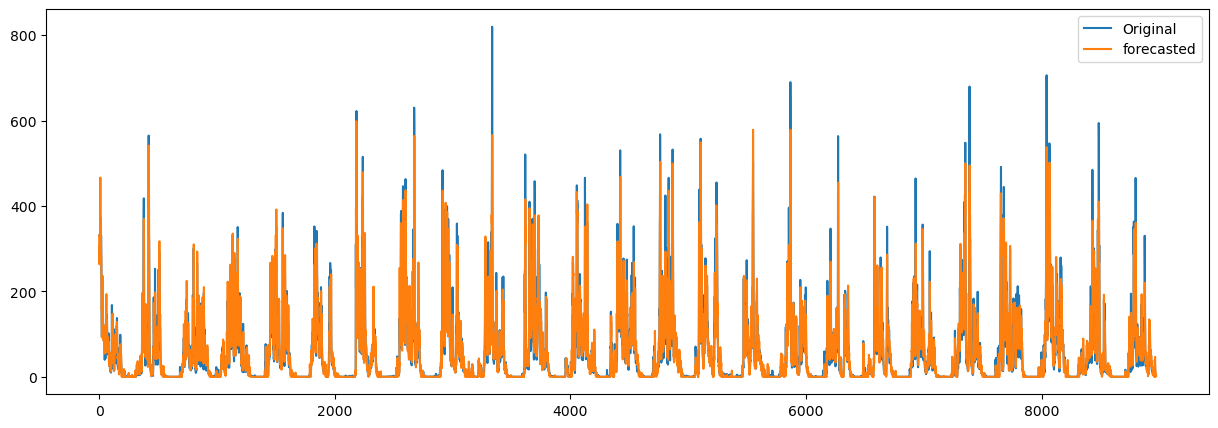

RMSE: 29.102381111341465
R-squared score: 0.88
MAD: 14.35202636670779
MAE score: 14.35


In [32]:
first_elements = [[row[0]] for row in asd]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

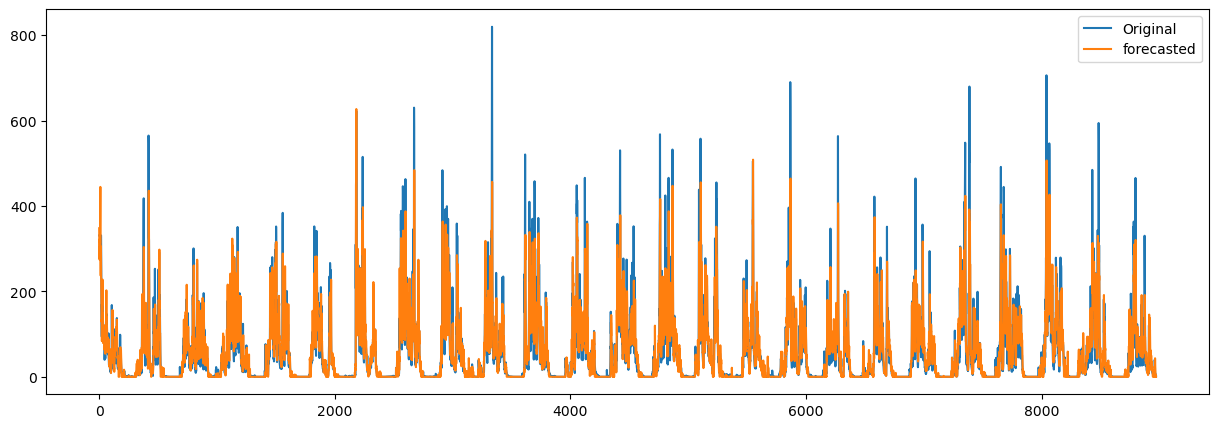

RMSE: 41.637510525394646
R-squared score: 0.75
MAD: 20.92318353610965
MAE score: 20.92


In [33]:
second_elements = [[row[1]] for row in asd]
#print(first_elements)
ppprr=np.array(second_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+1:-1],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

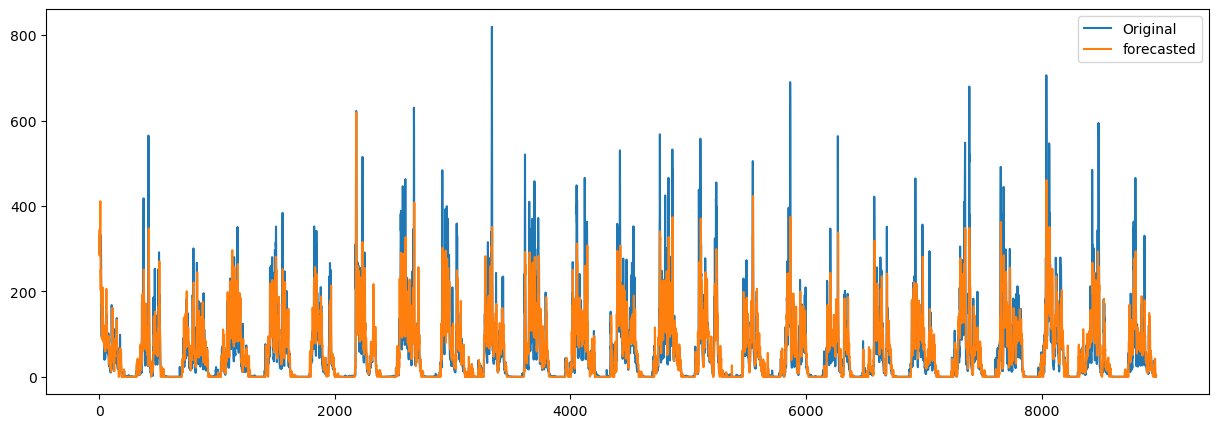

RMSE: 49.59158293549271
R-squared score: 0.65
MAD: 25.681842669401455
MAE score: 25.68


In [34]:
third_elements = [[row[2]] for row in asd]
#print(first_elements)
ppprr=np.array(third_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

for testing 
input shape is (14,7) past 14 days values of 7 attributes 
output shape is (1,3) 3 days future values

In [35]:
testy

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       ...,
       [0.04154771, 0.04737226, 0.0531968 ],
       [0.04737226, 0.0531968 , 0.07439708],
       [0.0531968 , 0.07439708, 0.08328355]])

In [36]:
testx.shape

(2683, 14, 8)

In [37]:
testx.shape

(2683, 14, 8)

In [38]:
fore=model1.predict(testx)

84/84 [==============================] - 0s 6ms/step


In [39]:
fore

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       ...,
       [0.05563512, 0.06997048, 0.08288472],
       [0.05180469, 0.0642731 , 0.07731525],
       [0.04979497, 0.07044515, 0.08753096]], dtype=float32)

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day1,day2,day3...)

In [40]:
first_elements = [[row[0]] for row in fore]
# print(first_elements)
ppprr=np.array(first_elements)
# print(pppr.shape)

In [41]:
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

In [42]:
first_elements = [[row[7]] for row in test]
# print(first_elements)
ppp=np.array(first_elements)
# print(pppr.shape)

In [43]:
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape

(2699,)

In [44]:
# disc_org=disc_org[n_past:-2]
# disc_org.shape

In [45]:
min(disc)

0.0

In [46]:
max(disc)

509.64462

In [47]:
min(disc_org)

0.0

In [48]:
max(disc_org)

877.064

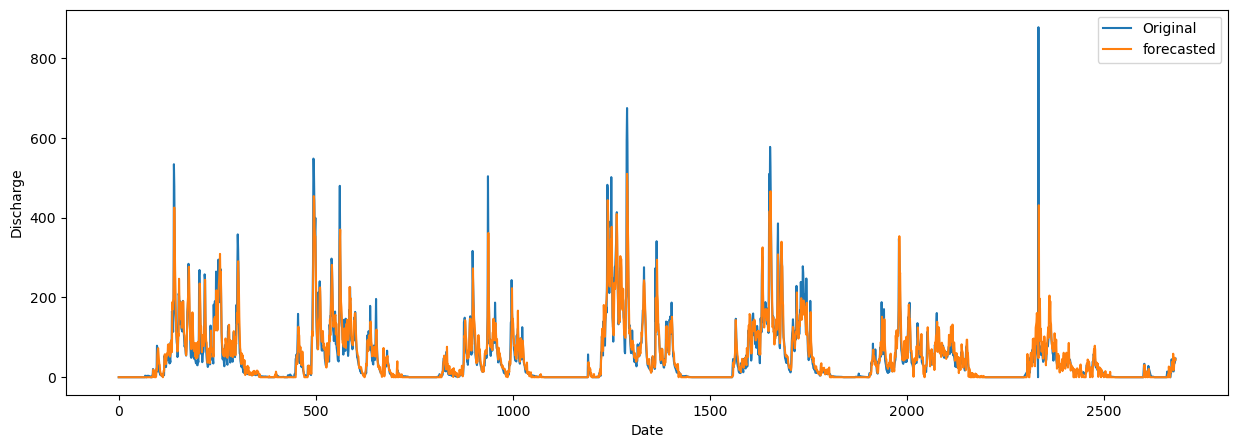

RMSE: 32.30359093037365
R-squared score: 0.83
MAD: 13.763857111098138
MAE score: 13.76


In [49]:
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))


In [50]:

forcast_period_dates=pd.date_range(x,periods=len(test),freq='1d').tolist()
forcast_dates=[]
for time in forcast_period_dates:
    forcast_dates.append(time.date())
print(forcast_dates[0])
print(len(forcast_dates))
forcast_dates[-1]

2010-01-10
2699


datetime.date(2017, 5, 31)

In [51]:

dt_forcast = np.column_stack((forcast_dates[n_past:-2], disc))
dt_forcast = pd.DataFrame(dt_forcast, columns=['Date', 'discharge'])
dt_forcast['Date'] = pd.to_datetime(dt_forcast['Date'])
dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC

dt_forcast = dt_forcast.set_index('Date')


orginal = disc_org[n_past:-2]
dt = np.column_stack((forcast_dates[n_past:-2], orginal))
dt = pd.DataFrame(dt, columns=['Date', 'discharge'])
dt['Date'] = pd.to_datetime(dt['Date'])
dt['Date'] = dt['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC


dt = dt.set_index('Date')
dt_forcast


,discharge
Date,
2010-01-24,0.0
2010-01-25,0.0
2010-01-26,0.0
2010-01-27,0.0
2010-01-28,0.0
...,...
2017-05-25,24.022793
2017-05-26,42.912498
2017-05-27,48.795559


In [52]:
dt

,discharge
Date,
2010-01-24,0.0
2010-01-25,0.0
2010-01-26,0.0
2010-01-27,0.0
2010-01-28,0.0
...,...
2017-05-25,31.497
2017-05-26,36.594
2017-05-27,36.44


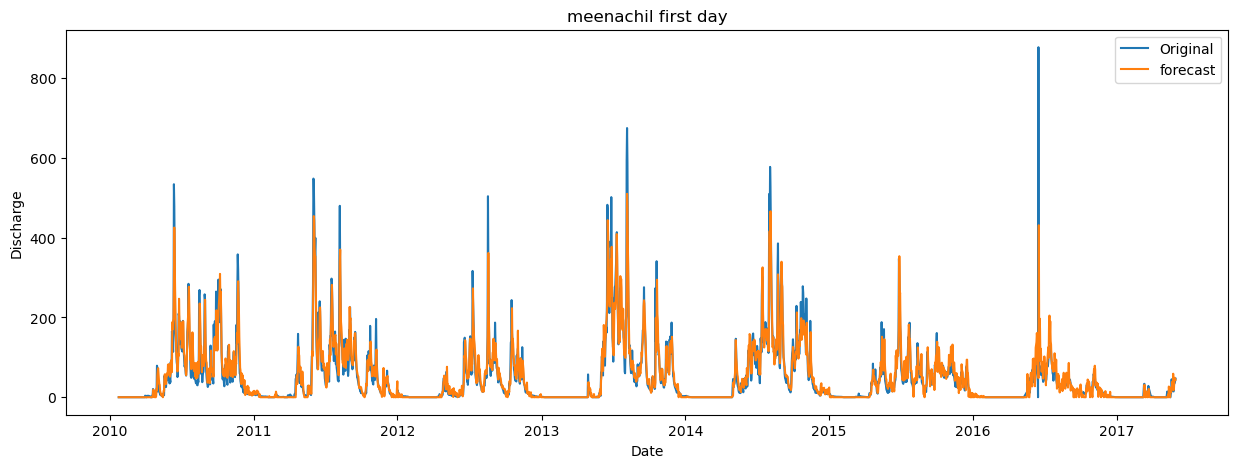

In [53]:
plt.figure(figsize=(15, 5))

plt.plot(dt.index, dt, label='Original')
plt.plot(dt_forcast.index, dt_forcast['discharge'], label='forecast')
plt.legend()
plt.title("meenachil first day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.show()
#firstday

In [54]:
dt['discharge'][-10:-1]

Date
2017-05-20     28.475
2017-05-21     27.806
2017-05-22     27.137
2017-05-23       16.6
2017-05-24     14.416
2017-05-25     31.497
2017-05-26     36.594
2017-05-27      36.44
2017-05-28    41.5485
Name: discharge, dtype: object

In [55]:
disc_org[-10:-1]

array([27.137 , 16.6   , 14.416 , 31.497 , 36.594 , 36.44  , 41.5485,
       46.657 , 65.251 ])

In [56]:
dt_forcast['discharge'][:10]

Date
2010-01-24    0.0
2010-01-25    0.0
2010-01-26    0.0
2010-01-27    0.0
2010-01-28    0.0
2010-01-29    0.0
2010-01-30    0.0
2010-01-31    0.0
2010-02-01    0.0
2010-02-02    0.0
Name: discharge, dtype: object

In [57]:
disc[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [58]:
dt_forcast['discharge'][-10:-1]

Date
2017-05-20    29.246735
2017-05-21    39.162354
2017-05-22    27.563807
2017-05-23    58.876228
2017-05-24    17.782207
2017-05-25    24.022793
2017-05-26    42.912498
2017-05-27    48.795559
2017-05-28    45.436031
Name: discharge, dtype: object

In [59]:
disc[-10:-1]

array([29.246735, 39.162354, 27.563807, 58.87623 , 17.782207, 24.022793,
       42.9125  , 48.79556 , 45.43603 ], dtype=float32)

In [60]:
rmse = sqrt(mean_squared_error(dt_forcast['discharge'],dt['discharge']))
print("RMSE:",rmse)
from sklearn.metrics import mean_squared_error, r2_score
import math
actual = disc_org[n_past:-2]
forecast = disc
r2 = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2))


RMSE: 32.30359093037365
R-squared score: 0.83


fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take second col only (day2,day3,day4...)

In [61]:
second_elements = [[row[1]] for row in fore]
# print(second_elements)
pppr=np.array(second_elements)
# print(pppr.shape)


In [62]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

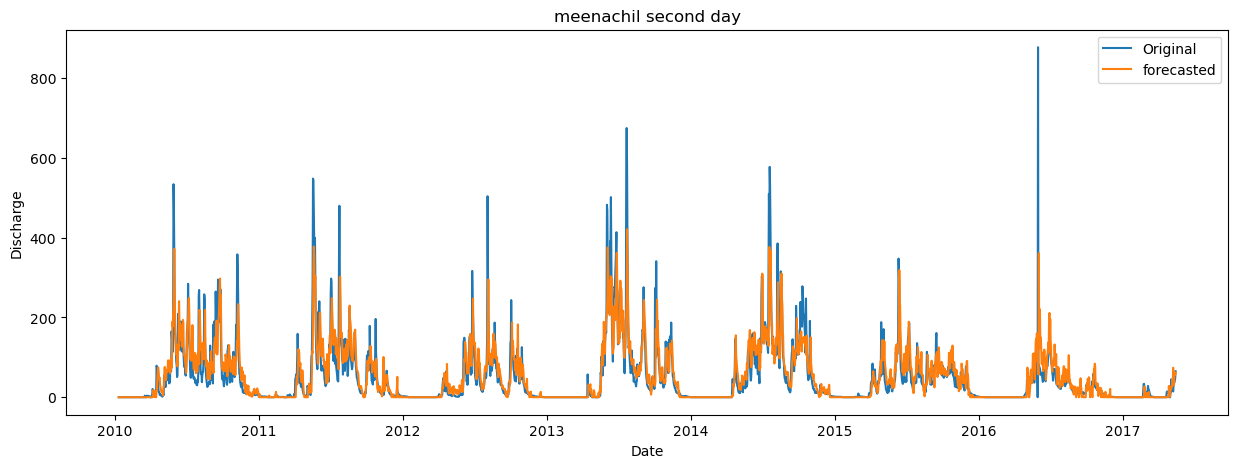

RMSE: 42.204179116193096
R-squared score: 0.71
MAD: 20.406734988908426
MAE score: 20.41


In [63]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+1:-1]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+1:-1],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("meenachil second day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
#secondday
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day3,day4,day5...)

In [64]:
third_elements = [[row[2]] for row in fore]
# print(third_elements)
pppr=np.array(third_elements)
# print(pppr.shape)


In [65]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape


(2683,)

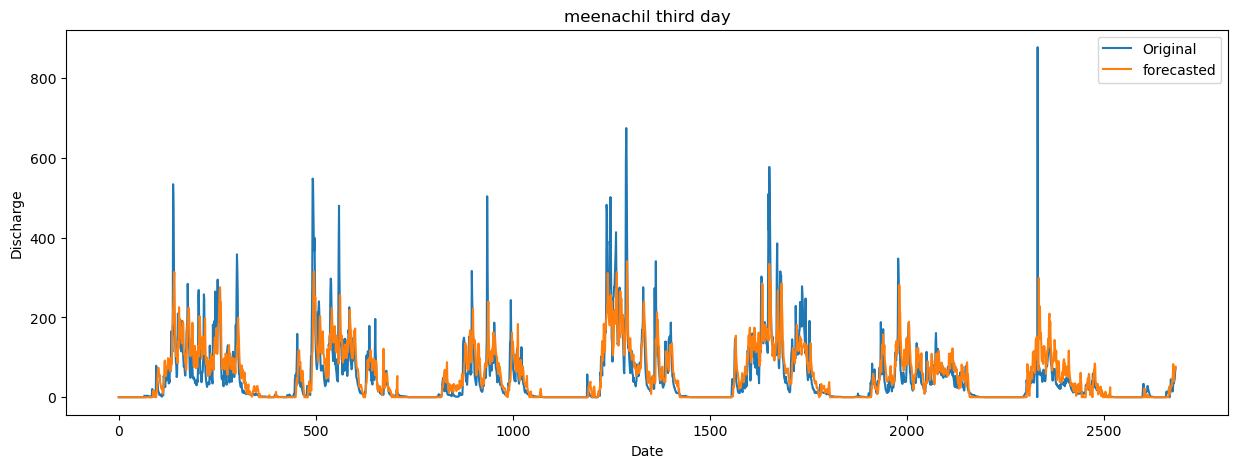

RMSE: 49.95086793064955
R-squared score: 0.59
MAD: 25.573222283995896
MAE score: 25.57


In [66]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+2:len(disc_org)]))]

plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(disc,label='forecasted')
plt.title("meenachil third day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
#thirdday
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [67]:
# model1.save('final_meenachil_GRU_final.h5')

In [68]:
import pandas as pd

data = [[4.32, 27.01, 0.44, 99.99, 2.48, 14.34, 1.09, 7.8],
        [5.84, 28.33, 0.13, 100.07, 3, 13.73, 1.095, 8.1],
        [3.46, 28.82, 0.07, 100.02, 4.25, 12.21, 1.07, 7.2],
        [4.12, 28.79, 1.35, 100.02, 4.18, 13.37, 1.075, 7.8],
        [2.87, 28.28, 4.04, 100.02, 3.06, 15.01, 1.1, 9.3],
        [3.33, 27.15, 5.12, 99.89, 4.89, 15.81, 1.11, 8.8],
        [1.68, 24.95, 32.67, 99.79, 2.48, 16.66, 1.12, 9.3],
        [1.21, 27.21, 4.51, 99.88, 2.63, 17.82, 1.1, 8.7],
        [4.77, 28.34, 3.02, 99.94, 2.46, 16.91, 1.22, 13.7],
        [6.23, 27.5, 1.89, 99.92, 1.49, 17.03, 1.575, 27.7],
        [6.46, 28.49, 1.55, 99.92, 3.43, 16.91, 1.21, 14.5],
        [5.67, 29.61, 0.17, 99.96, 3.8, 16.85, 1.23, 15.5],
        [6.01, 29.95, 0.14, 99.9, 3.7, 17.46, 1.11, 9.9],
        [6.06, 29.01, 0.19, 99.88, 1.48, 17.64, 1.07, 8.6]]

dfw = pd.DataFrame(data, columns=['ALLSKY_SFC_SW_DWN', 'TS', 'PRECTOTCORR', 'PS', 'WS10M_RANGE', 'QV2M', 'Mean Gauge (m)', 'Discharge (cumecs)'])



print(dfw)


    ALLSKY_SFC_SW_DWN     TS  PRECTOTCORR      PS  WS10M_RANGE   QV2M  \
0                4.32  27.01         0.44   99.99         2.48  14.34   
1                5.84  28.33         0.13  100.07         3.00  13.73   
2                3.46  28.82         0.07  100.02         4.25  12.21   
3                4.12  28.79         1.35  100.02         4.18  13.37   
4                2.87  28.28         4.04  100.02         3.06  15.01   
5                3.33  27.15         5.12   99.89         4.89  15.81   
6                1.68  24.95        32.67   99.79         2.48  16.66   
7                1.21  27.21         4.51   99.88         2.63  17.82   
8                4.77  28.34         3.02   99.94         2.46  16.91   
9                6.23  27.50         1.89   99.92         1.49  17.03   
10               6.46  28.49         1.55   99.92         3.43  16.91   
11               5.67  29.61         0.17   99.96         3.80  16.85   
12               6.01  29.95         0.14   99.90  

In [69]:
dfw=dfw.iloc[0:14,0:8]
dfw

,ALLSKY_SFC_SW_DWN,TS,PRECTOTCORR,PS,WS10M_RANGE,QV2M,Mean Gauge (m),Discharge (cumecs)
0,4.32,27.01,0.44,99.99,2.48,14.34,1.090,7.8
1,5.84,28.33,0.13,100.07,3.00,13.73,1.095,8.1
2,3.46,28.82,0.07,100.02,4.25,12.21,1.070,7.2
3,4.12,28.79,1.35,100.02,4.18,13.37,1.075,7.8
4,2.87,28.28,4.04,100.02,3.06,15.01,1.100,9.3
5,3.33,27.15,5.12,99.89,4.89,15.81,1.110,8.8
6,1.68,24.95,32.67,99.79,2.48,16.66,1.120,9.3
7,1.21,27.21,4.51,99.88,2.63,17.82,1.100,8.7
8,4.77,28.34,3.02,99.94,2.46,16.91,1.220,13.7
9,6.23,27.50,1.89,99.92,1.49,17.03,1.575,27.7


In [70]:
test1=scaler.transform(dfw)
test1


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([[ 5.59731544e-01,  6.33520449e-01, -4.30444283e-01,
         4.96992892e-01, -7.32834646e+01,  3.13392857e+00,
         1.06026786e-01,  8.89330767e-03],
       [ 7.63758389e-01,  7.39374499e-01, -4.53022578e-01,
         4.97390526e-01, -7.28740157e+01,  2.99776786e+00,
         1.06584821e-01,  9.23535797e-03],
       [ 4.44295302e-01,  7.78668805e-01, -4.57392571e-01,
         4.97142005e-01, -7.18897638e+01,  2.65848214e+00,
         1.03794643e-01,  8.20920708e-03],
       [ 5.32885906e-01,  7.76263031e-01, -3.64166060e-01,
         4.97142005e-01, -7.19448819e+01,  2.91741071e+00,
         1.04352679e-01,  8.89330767e-03],
       [ 3.65100671e-01,  7.35364876e-01, -1.68244720e-01,
         4.97142005e-01, -7.28267717e+01,  3.28348214e+00,
         1.07142857e-01,  1.06035591e-02],
       [ 4.26845638e-01,  6.44747394e-01, -8.95848507e-02,
         4.96495850e-01, -7.13858268e+01,  3.46205357e+00,
         1.08258929e-01,  1.00334753e-02],
       [ 2.05369128e-01,  4.683239

In [71]:
fore=[]
fore.append(test1[0:n_past,0:8])
fore=np.array(fore)
fore

array([[[ 5.59731544e-01,  6.33520449e-01, -4.30444283e-01,
          4.96992892e-01, -7.32834646e+01,  3.13392857e+00,
          1.06026786e-01,  8.89330767e-03],
        [ 7.63758389e-01,  7.39374499e-01, -4.53022578e-01,
          4.97390526e-01, -7.28740157e+01,  2.99776786e+00,
          1.06584821e-01,  9.23535797e-03],
        [ 4.44295302e-01,  7.78668805e-01, -4.57392571e-01,
          4.97142005e-01, -7.18897638e+01,  2.65848214e+00,
          1.03794643e-01,  8.20920708e-03],
        [ 5.32885906e-01,  7.76263031e-01, -3.64166060e-01,
          4.97142005e-01, -7.19448819e+01,  2.91741071e+00,
          1.04352679e-01,  8.89330767e-03],
        [ 3.65100671e-01,  7.35364876e-01, -1.68244720e-01,
          4.97142005e-01, -7.28267717e+01,  3.28348214e+00,
          1.07142857e-01,  1.06035591e-02],
        [ 4.26845638e-01,  6.44747394e-01, -8.95848507e-02,
          4.96495850e-01, -7.13858268e+01,  3.46205357e+00,
          1.08258929e-01,  1.00334753e-02],
        [ 2.0536

In [72]:
fore=model1.predict(fore)

1/1 [==============================] - 0s 29ms/step


In [73]:
fore

array([[18.752033, 33.45892 , 42.786907]], dtype=float32)

In [74]:
f=[]
fir=[]
x=fore[0][0]
fir.append(x)
f.append(fir)
f

[[18.752033]]

In [75]:
import numpy as np
forcast_copies = np.repeat(f, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc

array([16446.732], dtype=float32)

##### 